In [68]:
import pandas as pd


In [69]:
df = pd.read_csv("final_ds.csv")


In [70]:
print(df.head())


   Languages    Salary Machine Learning    Education Benefits  Experience  \
0          5  144500.0              Yes          PhD       No         1.0   
1          2  144500.0              Yes  Unspecified      Yes         0.0   
2          1  144500.0              Yes       Master       No         0.0   
3          4  144500.0              Yes          PhD      Yes         0.0   
4          4  144500.0              Yes  Unspecified       No         1.0   

                                                 url       Type  
0  https://www.linkedin.com/jobs/view/3480836400/...  Scientist  
1  https://www.linkedin.com/jobs/view/3482317582/...  Scientist  
2  https://www.linkedin.com/jobs/view/3485598972/...  Scientist  
3  https://www.linkedin.com/jobs/view/3474104997/...  Scientist  
4  https://www.linkedin.com/jobs/view/3499243413/...  Scientist  


In [71]:
from sklearn.cluster import KMeans

In [90]:
X = df[['Salary', 'Languages']].copy()

In [91]:
df["Salary"] = [float(str(i).replace(",", "")) for i in df["Salary"]]

<AxesSubplot:xlabel='Salary', ylabel='Languages'>

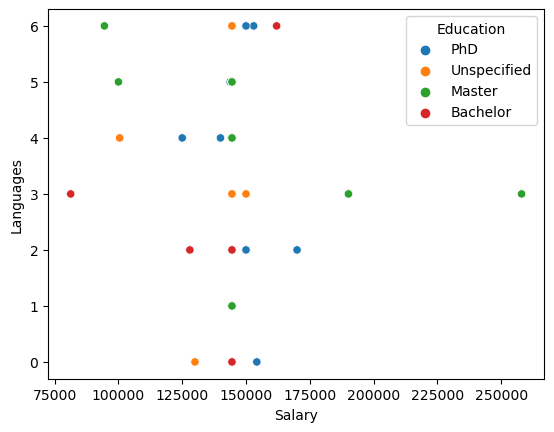

In [92]:
import seaborn as sns

sns.scatterplot(data = df, x = 'Salary', y = 'Languages', hue = 'Education')

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Salary', 'Languages']], df[['Education']], test_size=0.3, random_state=0)

In [100]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [101]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<AxesSubplot:xlabel='Salary', ylabel='Languages'>

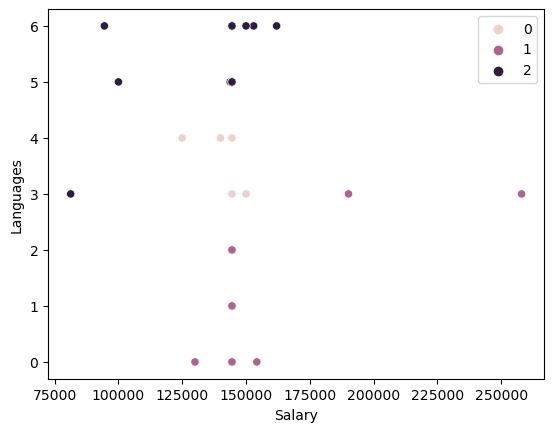

In [102]:
sns.scatterplot(data = X_train, x = 'Salary', y = 'Languages', hue = kmeans.labels_)


<AxesSubplot:ylabel='Education'>

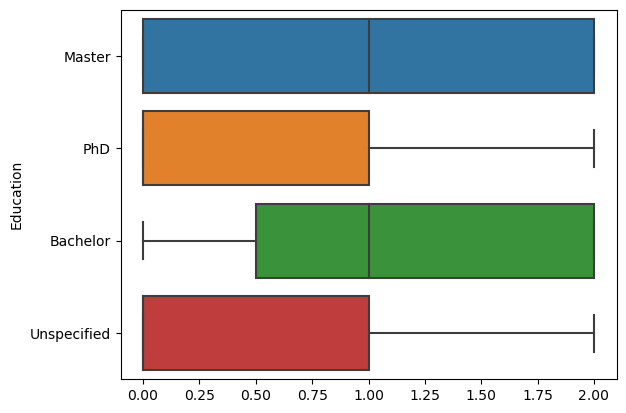

In [103]:
sns.boxplot(x = kmeans.labels_, y = y_train['Education'])


In [104]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.6048650175071568